### Import libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Csv

df=pd.read_csv('healthcare_dataset.csv')
df.head()

In [12]:
df.shape

(55500, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [20]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

### fix name

In [27]:
df['Name']=df['Name'].str.lower()
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### fix 2 datas column

In [32]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors='coerce')
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], errors='coerce')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [34]:
### Age

In [42]:
df = df[(df["Age"] > 0) & (df["Age"] < 120)]

### handling missing values

In [49]:
df.fillna(method="ffill", inplace=True)

C:\Users\Hosopa\AppData\Local\Temp\ipykernel_19648\173857299.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


### EDA

### Numerical Features

### Age distribution

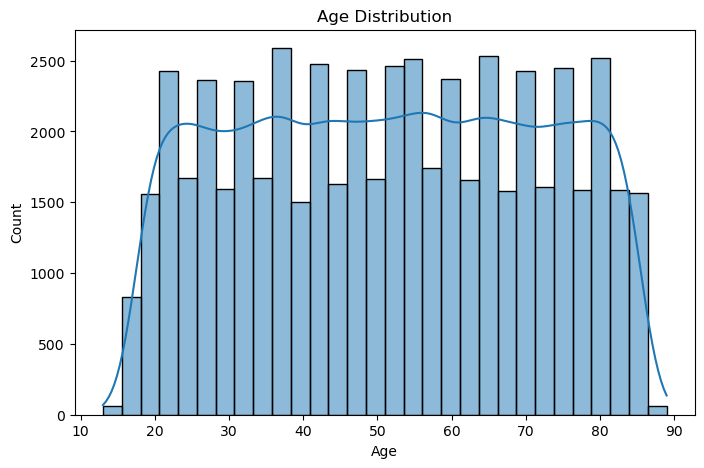

In [61]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [64]:
### Categorical Features

In [68]:
categorical_columns = ["Gender", "Blood Type", "Medical Condition", "Admission Type"]
for col in categorical_columns:
    print(f"\nDistribution {col}:")
    print(df[col].value_counts())


Distribution Gender:
Gender
Male      27774
Female    27726
Name: count, dtype: int64

Distribution Blood Type:
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

Distribution Medical Condition:
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

Distribution Admission Type:
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


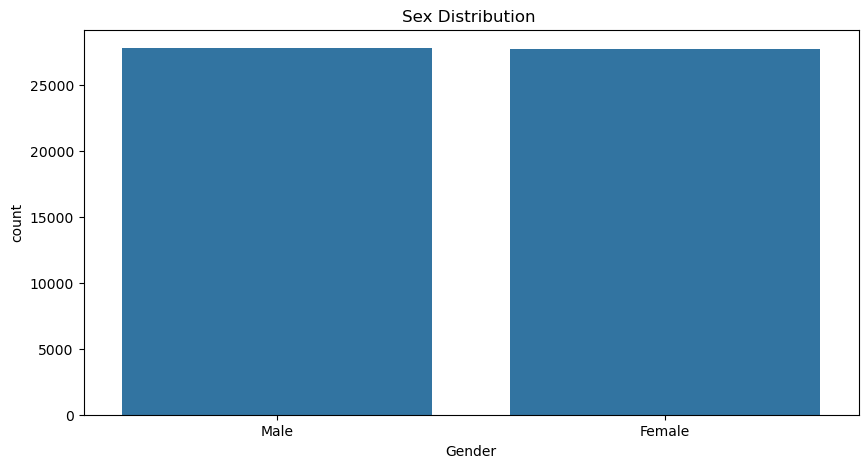

In [72]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Gender"])
plt.title("Sex Distribution ")
plt.show()

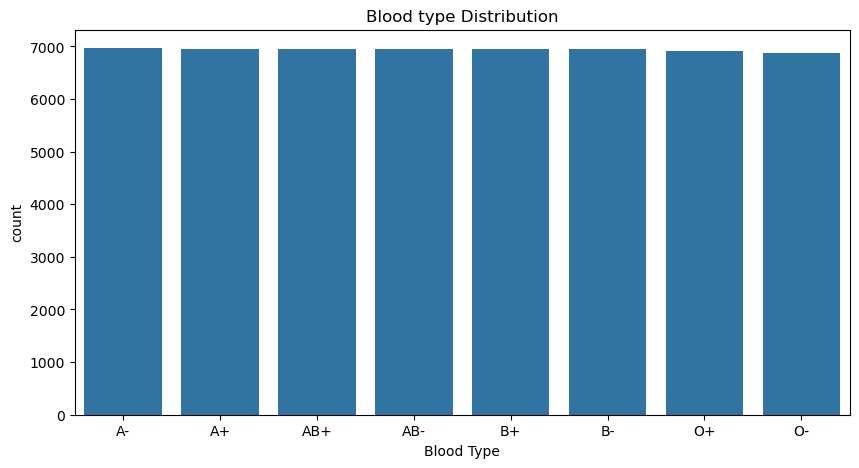

In [76]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Blood Type"], order=df["Blood Type"].value_counts().index)
plt.title("Blood type Distribution")
plt.show()

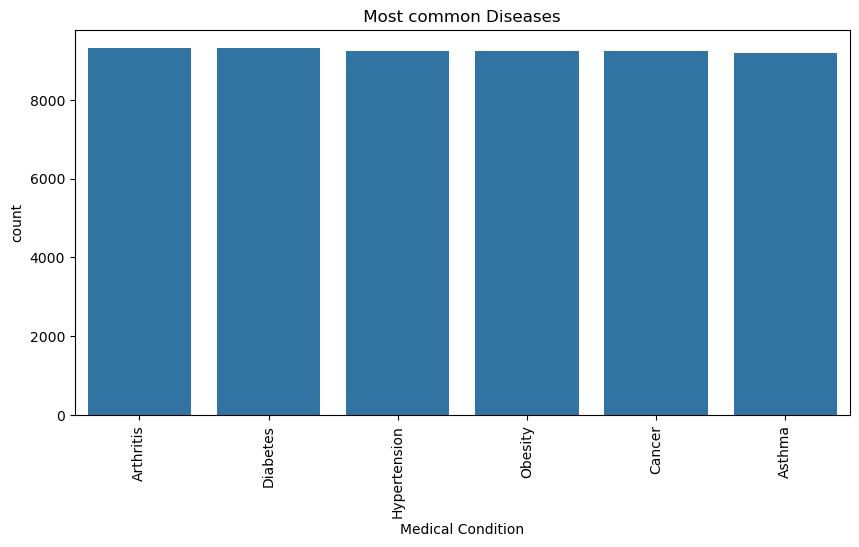

In [78]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Medical Condition"], order=df["Medical Condition"].value_counts().index)
plt.xticks(rotation=90)
plt.title(" Most common Diseases ")
plt.show()

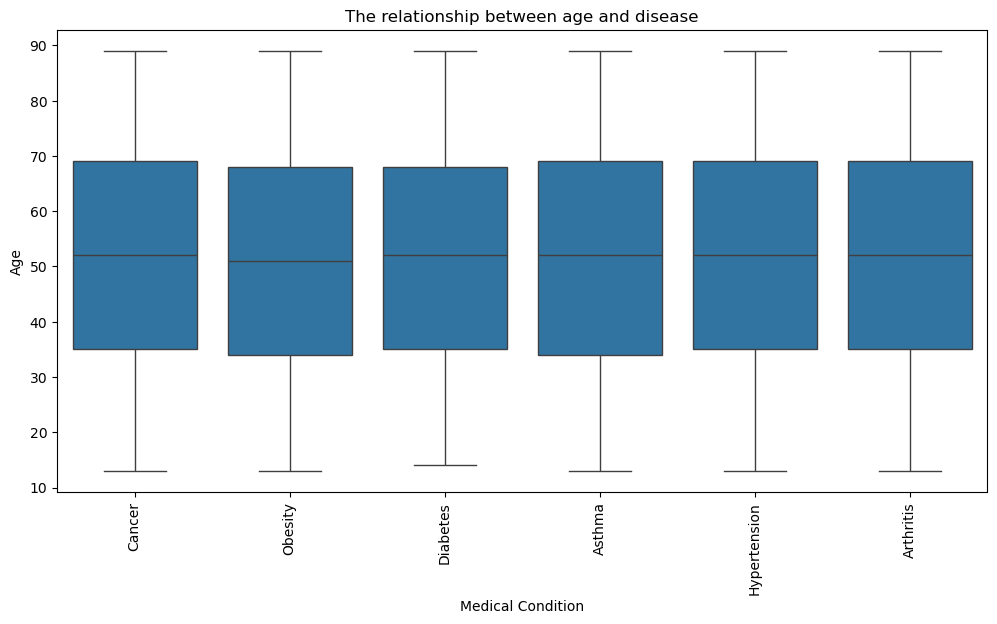

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Medical Condition"], y=df["Age"])
plt.xticks(rotation=90)
plt.title("The relationship between age and disease")
plt.show()

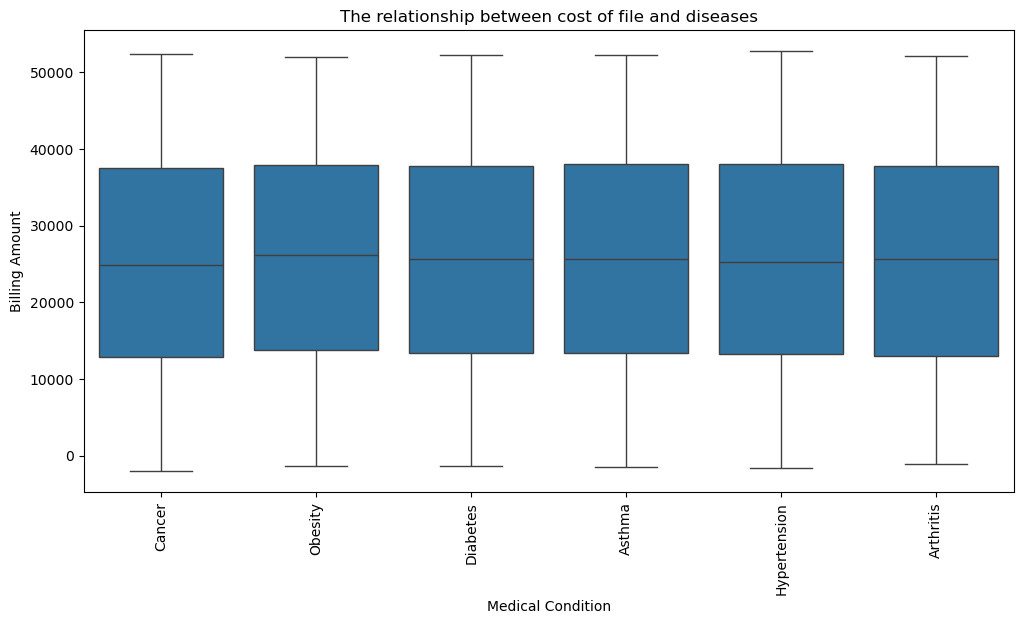

In [90]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Medical Condition"], y=df["Billing Amount"])
plt.xticks(rotation=90)
plt.title("The relationship between cost of file and diseases")
plt.show()

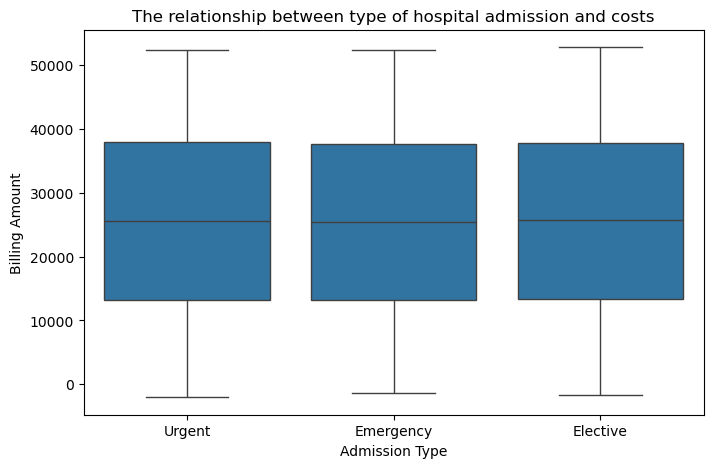

In [92]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Admission Type"], y=df["Billing Amount"])
plt.title("The relationship between type of hospital admission and costs")
plt.show()

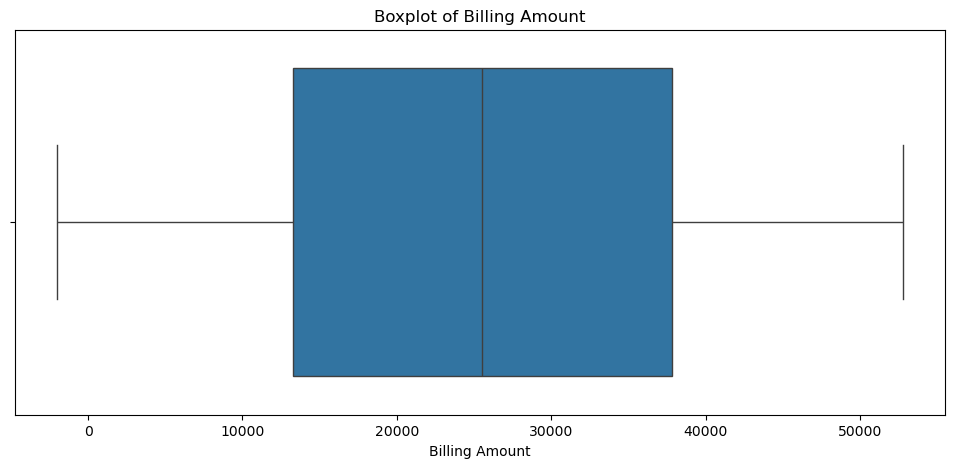

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Billing Amount"])
plt.title("Boxplot of Billing Amount")
plt.show()


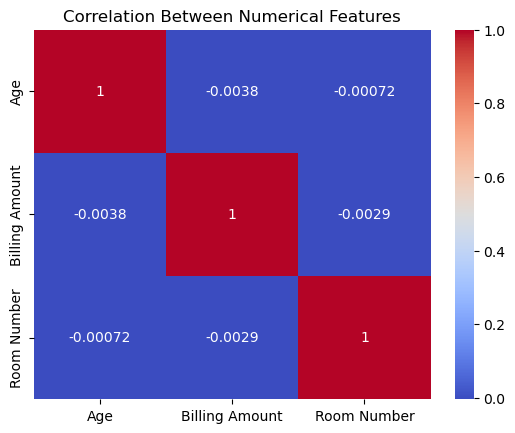

In [100]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()
